# Breast cancer data classification

Classification steps:

1. In the training data csv file the classification values were changed from nominal - ("B","M") to numeric - (0,1) 
2. Uploading and scaling training and main test datasets: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import csv

from sklearn import neighbors
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

data = np.loadtxt(open("breast-cancer-diagnostic.shuf.lrn.csv", "r"), delimiter=",", skiprows=1)
target = data[:,1]
trainingdata = data[:,2:]

rawtestdata = np.loadtxt(open("breast-cancer-diagnostic.shuf.tes.csv", "r"), delimiter=",", skiprows=1)
testdata = rawtestdata[:,1:]
main_test_id = np.array(rawtestdata[:,0])

trainingdata = preprocessing.scale(trainingdata)
MainTest = preprocessing.scale(testdata)


3. Splitting training data to training(70%) and test(30%) sets with 5 random splits:

In [57]:
ss = ShuffleSplit(n_splits=5, test_size=0.3)
random_splits = [(train_index, test_index) for train_index, test_index in ss.split(trainingdata)]

4. Knn classification

Graphs with results of Knn classification (accuracy, recall, precision) with different parameters:

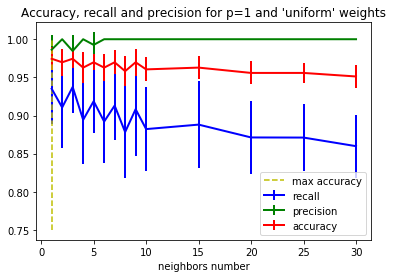

The best number of neighbours - 1 ,with accuracy - 0.9744186046511628


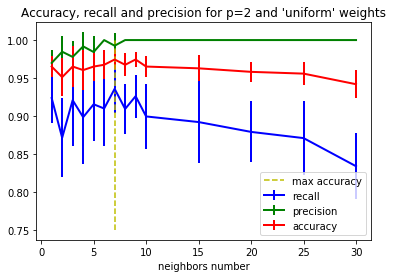

The best number of neighbours - 7 ,with accuracy - 0.9744186046511628


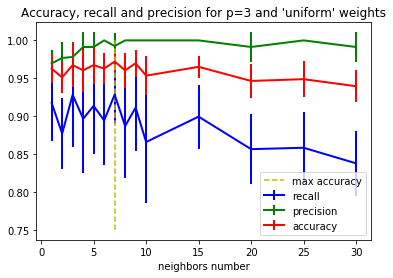

The best number of neighbours - 7 ,with accuracy - 0.9720930232558139


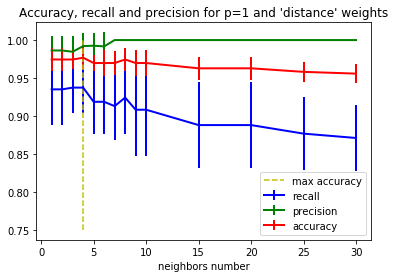

The best number of neighbours - 4 ,with accuracy - 0.9767441860465116


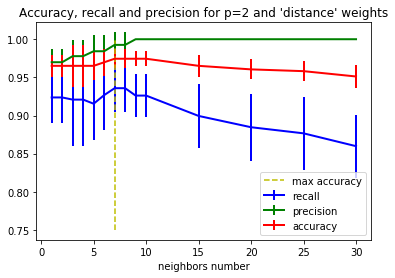

The best number of neighbours - 7 ,with accuracy - 0.9744186046511628


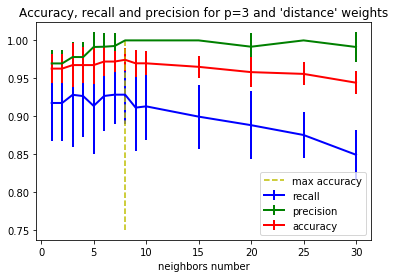

The best number of neighbours - 8 ,with accuracy - 0.9744186046511628
[0.9744186046511628, 0.9744186046511628, 0.9720930232558139, 0.9767441860465116, 0.9744186046511628, 0.9744186046511628]


In [16]:
nn = np.array([1,2,3,4,5,6,7,8,9,10,15,20,25,30]) #neighbours number
lp = [1,2,3]
w = ["uniform", "distance"]
# lp = [1]
# w = ["distance"]
acc_n = []
acc_v = []

Acc_max = []

for neigh_w in w:
    for neigh_lp in lp:
        mean_acc =[]
        mean_rec =[]
        mean_pre =[]

        std_acc = []
        std_rec = []
        std_pre = []
 
        for n in nn:
            split_acc = [] 
            split_rec = []
            split_pre = []

            for split in random_splits:

                train, test = split

                knn = neighbors.KNeighborsClassifier(n_neighbors=n, p=neigh_lp , weights=neigh_w)
                knn.fit(trainingdata[train], target[train])
                knnresult = knn.predict(trainingdata[test])
                split_acc.append(metrics.accuracy_score(target[test], knnresult))
                split_rec.append(metrics.recall_score(target[test], knnresult))
                split_pre.append(metrics.precision_score(target[test], knnresult))

            std_acc.append(statistics.stdev(split_acc))
            mean_acc.append(statistics.mean(split_acc))

            std_rec.append(statistics.stdev(split_rec))
            mean_rec.append(statistics.mean(split_rec))

            std_pre.append(statistics.stdev(split_pre))
            mean_pre.append(statistics.mean(split_pre))


#         X = np.arange(1,nn)
        X = nn
        Y = np.array(mean_acc)
        nMax = np.argmax(Y) + 1

        Xmax = np.tile(nMax,2)
        Ymax = np.array([0.75, 1])

        plt.errorbar(X, mean_rec, std_rec, color='blue', label = 'recall', lw=2)
        plt.errorbar(X, mean_pre, std_pre, color='green', label = 'precision', lw=2)
        plt.errorbar(X, mean_acc, std_acc, color='red', label = 'accuracy',  lw=2)
        plt.plot(Xmax, Ymax, 'y--', label = 'max accuracy')
        plt.xlabel('neighbors number')
        plt.legend()
        plt.title("Accuracy, recall and precision for p="+str(neigh_lp)+" and '"+neigh_w+ "' weights")
        plt.savefig("knn_p="+str(neigh_lp)+"_"+neigh_w)
        plt.show() 
        
        acc_n.append(nMax)
        acc_v.append(Y[nMax -1])
        print('The best number of neighbours -',nMax,',with accuracy -', Y[nMax-1])
        Acc_max.append(Y[nMax-1])
print(Acc_max)
        

Predicting Main test data with knn and best parameters from previous results, writing results in new CSV file converting back the type of classes from numeric to nominal: 

In [17]:
accMax = np.max(acc_v)
accMax_i = np.argmax(acc_v)
best_n = acc_n[accMax_i] #best neighbours number

print(best_n)

knn = neighbors.KNeighborsClassifier(n_neighbors=1, p=1 , weights="distance")
knn.fit(trainingdata, target)
knnresult = knn.predict(MainTest)
    
knn_solution = np.array(knnresult)
knn_id_sol = np.column_stack((main_test_id, knn_solution))

# print("KNN accuracy",knn.score(testdata,testclasses))
# print(metrics.confusion_matrix(testclasses,knnresult))

with open('breast_cancer_solution_knn.csv', 'w') as csvfile:
    fieldnames = ['ID', 'class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in knn_id_sol:
        if row[1] == 0:
            writer.writerow({'ID': int(row[0]), 'class': "B"})
        else:
            writer.writerow({'ID': int(row[0]), 'class': "M"})


1


5. Decision Tree Classification

Graphs with results on Decision tree classification (accuracy, recall, precision) with different parameters: 

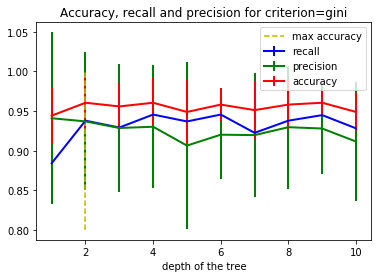

The best depth - 2 ,with accuracy - 0.9604651162790697


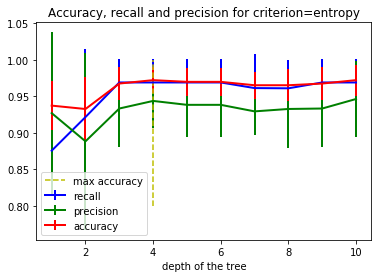

The best depth - 4 ,with accuracy - 0.9720930232558139


In [52]:

c = ["gini", "entropy"]
depth = [1,2,3,4,5,6,7,8,9,10]

for crit in c:

    mean_acc =[]
    mean_rec =[]
    mean_pre =[]

    std_acc = []
    std_rec = []
    std_pre = []

    for md in depth:
        split_acc = [] 
        split_rec = []
        split_pre = []

        for split in random_splits:

            train, test = split

            dtree = tree.DecisionTreeClassifier(criterion = crit, max_depth = md)
            dtree.fit(trainingdata[train], target[train])
            dtreeresult = dtree.predict(trainingdata[test])
            split_acc.append(metrics.accuracy_score(target[test], dtreeresult))
            split_rec.append(metrics.recall_score(target[test], dtreeresult))
            split_pre.append(metrics.precision_score(target[test], dtreeresult))

        std_acc.append(statistics.stdev(split_acc))
        mean_acc.append(statistics.mean(split_acc))

        std_rec.append(statistics.stdev(split_rec))
        mean_rec.append(statistics.mean(split_rec))

        std_pre.append(statistics.stdev(split_pre))
        mean_pre.append(statistics.mean(split_pre))

    X = np.array(depth)
    Y = np.array(mean_acc)
    nd = np.argmax(Y)
    best_depth = depth[nd]

    Xmax = np.tile(best_depth,2)
    Ymax = np.array([0.8, 1])
    
    plt.errorbar(X, mean_rec, std_rec, color='blue', label = 'recall', lw=2)
    plt.errorbar(X, mean_pre, std_pre, color='green', label = 'precision', lw=2)
    plt.errorbar(X, mean_acc, std_acc, color='red', label = 'accuracy',  lw=2)
    plt.plot(Xmax, Ymax, 'y--', label = 'max accuracy')
    plt.xlabel('depth of the tree')
    plt.legend()
    plt.title("Accuracy, recall and precision for criterion="+str(crit))
    plt.savefig("dtree_"+crit)
    plt.show() 

    print('The best depth -',best_depth,',with accuracy -', np.max(Y))



Training the Main Test Data with Decision Tree and critetion - entropy: 

In [30]:
dtree=tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(trainingdata,target)
dtreeresult=dtree.predict(MainTest)
    
dtree_solution = np.array(dtreeresult)
dtree_id_sol = np.column_stack((main_test_id, dtree_solution))

# print(metrics.confusion_matrix(testclasses,knnresult))



with open('breast_cancer_solution_decision_tree.csv', 'w') as csvfile:
    fieldnames = ['ID', 'class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in dtree_id_sol:
        if row[1] == 0:
            writer.writerow({'ID': int(row[0]), 'class': "B"})
        else:
            writer.writerow({'ID': int(row[0]), 'class': "M"})

#     writer.writeheader()
#     for row in dtree_id_sol:
#         writer.writerow({'ID': row[0], 'class': row[1]})


In [ ]:
Decision Tree building

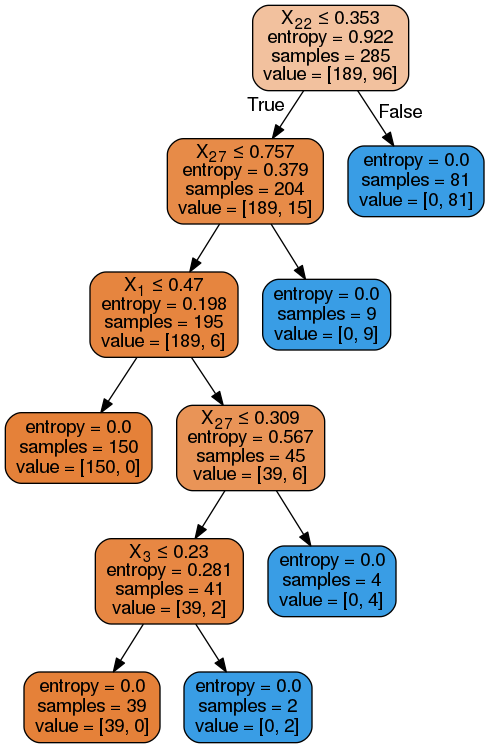

In [31]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

6. Random Forest classification

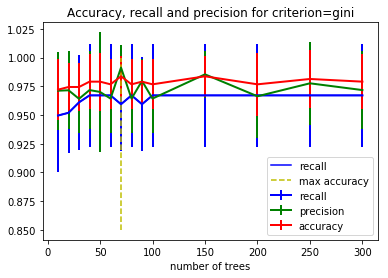

The best number of the trees - 70 ,with accuracy - 0.9837209302325581


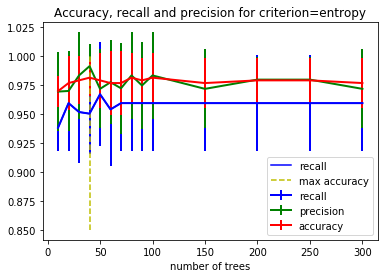

The best number of the trees - 40 ,with accuracy - 0.9813953488372094


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

c = ["gini", "entropy"]
depth = [1,4,8,12,16,20]
trees_num = [10,20,30,40,50,60,70,80,90,100,150,200,250,300]

for crit in c:

    mean_acc =[]
    mean_rec =[]
    mean_pre =[]

    std_acc = []
    std_rec = []
    std_pre = []

    for fn in trees_num:
        split_acc = [] 
        split_rec = []
        split_pre = []

        for split in random_splits:

            train, test = split

            rforest = RandomForestClassifier(n_estimators = fn, criterion = crit)# max_depth = md)
            rforest.fit(trainingdata[train], target[train])
            rforestresult = rforest.predict(trainingdata[test])
            split_acc.append(metrics.accuracy_score(target[test], rforestresult))
            split_rec.append(metrics.recall_score(target[test], rforestresult))
            split_pre.append(metrics.precision_score(target[test], rforestresult))

        std_acc.append(statistics.stdev(split_acc))
        mean_acc.append(statistics.mean(split_acc))
       
        std_rec.append(statistics.stdev(split_rec))
        mean_rec.append(statistics.mean(split_rec))

        std_pre.append(statistics.stdev(split_pre))
        mean_pre.append(statistics.mean(split_pre))

    X = np.array(trees_num)
    Y = np.array(mean_acc)
    
    nd = np.argmax(Y)
    best_trees_num = trees_num[nd]
    
    Xmax = np.tile(best_trees_num,2)
    Ymax = np.array([0.85, 1])
    
    plt.plot(X, mean_rec, color='blue', label = 'recall')
    plt.errorbar(X, mean_rec, std_rec, color='blue', label = 'recall', lw=2)
    plt.errorbar(X, mean_pre, std_pre, color='green', label = 'precision', lw=2)
    plt.errorbar(X, mean_acc, std_acc, color='red', label = 'accuracy',  lw=2)
    plt.plot(Xmax, Ymax, 'y--', label = 'max accuracy')
    plt.xlabel('number of trees')
    plt.legend()
    plt.title("Accuracy, recall and precision for criterion="+str(crit))
    plt.savefig("random_for_"+crit)
    plt.show() 

    print('The best number of the trees -',best_trees_num,',with accuracy -', np.max(Y))


In [55]:
rforest = RandomForestClassifier(n_estimators = 10, criterion='entropy')
rforest.fit(trainingdata,target)
rforestresult = rforest.predict(MainTest)
    
rfor_solution = np.array(rforestresult)
rfor_id_sol = np.column_stack((main_test_id, rfor_solution))

# print(metrics.confusion_matrix(testclasses,knnresult))

with open('breast_cancer_solution_random_forest.csv', 'w') as csvfile:
    fieldnames = ['ID', 'class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for row in rfor_id_sol:
        if row[1] == 0:
            writer.writerow({'ID': int(row[0]), 'class': "B"})
        else:
            writer.writerow({'ID': int(row[0]), 'class': "M"})

    
#     writer.writeheader()
#     for row in rfor_id_sol:
#         writer.writerow({'ID': row[0], 'class': row[1]})


7. Naive Bayes Classification

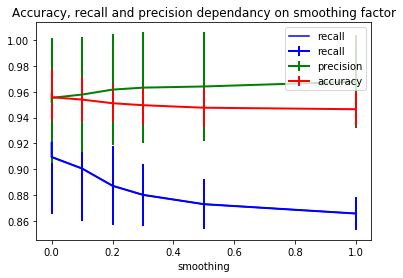

best accuracy 0.958139534883721 smoothing 0


In [100]:

from sklearn.naive_bayes import GaussianNB

mean_acc =[]
mean_rec =[]
mean_pre =[]

std_acc = []
std_rec = []
std_pre = []

split_acc = [] 
split_rec = []
split_pre = []
prio = np.arange(0.1,1,0.1)
smooth = [1,5e-1,3e-1,2e-1,1e-1,1e-5,1e-30,0]
for a in smooth:
    for split in random_splits:

        train, test = split

        naiveb = GaussianNB(priors=None, var_smoothing=a)
        naiveb.fit(trainingdata[train], target[train])
        naivebresult = naiveb.predict(trainingdata[test])
        split_acc.append(metrics.accuracy_score(target[test], naivebresult))
        split_rec.append(metrics.recall_score(target[test], naivebresult))
        split_pre.append(metrics.precision_score(target[test], naivebresult))

    std_acc.append(statistics.stdev(split_acc))
    mean_acc.append(statistics.mean(split_acc))

    std_rec.append(statistics.stdev(split_rec))
    mean_rec.append(statistics.mean(split_rec))

    std_pre.append(statistics.stdev(split_pre))
    mean_pre.append(statistics.mean(split_pre))    

X = smooth
Y = np.array(mean_acc)
smo = np.argmax(Y)

# Xmax = np.tile(best_depth,2)
# Ymax = np.array([0.8, 1])

plt.plot(X, mean_rec, color='blue', label = 'recall')
plt.errorbar(X, mean_rec, std_rec, color='blue', label = 'recall', lw=2)
plt.errorbar(X, mean_pre, std_pre, color='green', label = 'precision', lw=2)
plt.errorbar(X, mean_acc, std_acc, color='red', label = 'accuracy',  lw=2)
#     plt.plot(Xmax, Ymax, 'y--', label = 'max accuracy')
plt.xlabel('smoothing')
plt.legend()
plt.title("Accuracy, recall and precision dependancy on smoothing factor")
plt.savefig("naiveb_smooth")
plt.show() 

print("best accuracy", np.max(Y), "smoothing", smooth[smo])

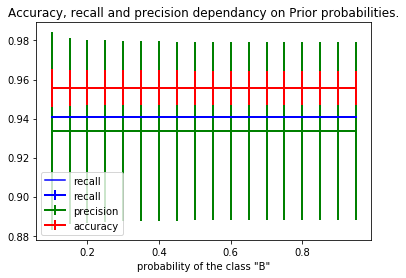

best accuracy 0.9558139534883722 priors 0.1
[0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722, 0.9558139534883722]


In [118]:

from sklearn.naive_bayes import GaussianNB

mean_acc =[]
mean_rec =[]
mean_pre =[]

std_acc = []
std_rec = []
std_pre = []

split_acc = [] 
split_rec = []
split_pre = []
prio = np.arange(0.1,1,0.05)
smooth = [1,5e-1,3e-1,2e-1,1e-1,1e-5,1e-30,0]
for a in prio:
    for split in random_splits:

        train, test = split

        naiveb = GaussianNB()
        naiveb.fit(trainingdata[train], target[train])
        naivebresult = naiveb.predict(trainingdata[test])
        split_acc.append(metrics.accuracy_score(target[test], naivebresult))
        split_rec.append(metrics.recall_score(target[test], naivebresult))
        split_pre.append(metrics.precision_score(target[test], naivebresult))

    std_acc.append(statistics.stdev(split_acc))
    mean_acc.append(statistics.mean(split_acc))

    std_rec.append(statistics.stdev(split_rec))
    mean_rec.append(statistics.mean(split_rec))

    std_pre.append(statistics.stdev(split_pre))
    mean_pre.append(statistics.mean(split_pre))    

X = prio
Y = np.array(mean_acc)
smo = np.argmax(Y)

# Xmax = np.tile(best_depth,2)
# Ymax = np.array([0.8, 1])

plt.plot(X, mean_rec, color='blue', label = 'recall')
plt.errorbar(X, mean_rec, std_rec, color='blue', label = 'recall', lw=2)
plt.errorbar(X, mean_pre, std_pre, color='green', label = 'precision', lw=2)
plt.errorbar(X, mean_acc, std_acc, color='red', label = 'accuracy',  lw=2)
#     plt.plot(Xmax, Ymax, 'y--', label = 'max accuracy')
plt.xlabel('probability of the class "B"')
plt.legend()
plt.title("Accuracy, recall and precision dependancy on Prior probabilities.")
plt.savefig("naiveb_prob")
plt.show() 

print("best accuracy", np.max(Y), "priors", prio[smo])
print(mean_acc)

# Not scaled data tests KNN

In [137]:
data = np.loadtxt(open("breast-cancer-diagnostic.shuf.lrn.csv", "r"), delimiter=",", skiprows=1)
ntarget = data[:,1]
ntrainingdata = data[:,2:]

ss1 = ShuffleSplit(n_splits=5, test_size=0.3)
random_splits1 = [(train_index, test_index) for train_index, test_index in ss1.split(ntrainingdata)]

ss = ShuffleSplit(n_splits=5, test_size=0.3)
random_splits = [(train_index, test_index) for train_index, test_index in ss.split(trainingdata)]

mean_acc =[]
mean_rec =[]
mean_pre =[]

std_acc = []
std_rec = []
std_pre = []

split_acc = [] 
split_rec = []
split_pre = []

mean_acc1 =[]
mean_rec1 =[]
mean_pre1 =[]

std_acc1 = []
std_rec1 = []
std_pre1 = []

split_acc1 = [] 
split_rec1 = []
split_pre1 = []

for split in random_splits:

    train, test = split

    knn = neighbors.KNeighborsClassifier(n_neighbors=4, p=1 , weights="distance")
    knn.fit(ntrainingdata[train], ntarget[train])
    knnresult = knn.predict(ntrainingdata[test])
    split_acc1.append(metrics.accuracy_score(ntarget[test], knnresult))
    split_rec1.append(metrics.recall_score(ntarget[test], knnresult))
    split_pre1.append(metrics.precision_score(ntarget[test], knnresult))
    
std_acc1.append(statistics.stdev(split_acc1))
mean_acc1.append(statistics.mean(split_acc1))

std_rec1.append(statistics.stdev(split_rec1))
mean_rec1.append(statistics.mean(split_rec1))

std_pre1.append(statistics.stdev(split_pre1))
mean_pre1.append(statistics.mean(split_pre1))


for split in random_splits:

    train, test = split

    knn = neighbors.KNeighborsClassifier(n_neighbors=4, p=1, weights="distance")
    knn.fit(trainingdata[train], target[train])
    knnresult = knn.predict(trainingdata[test])
    split_acc.append(metrics.accuracy_score(target[test], knnresult))
    split_rec.append(metrics.recall_score(target[test], knnresult))
    split_pre.append(metrics.precision_score(target[test], knnresult))
    
std_acc.append(statistics.stdev(split_acc))
mean_acc.append(statistics.mean(split_acc))

std_rec.append(statistics.stdev(split_rec))
mean_rec.append(statistics.mean(split_rec))

std_pre.append(statistics.stdev(split_pre))
mean_pre.append(statistics.mean(split_pre))


print(mean_acc, mean_acc1)
print(mean_rec, mean_rec1)
print(mean_pre, mean_pre1)

[0.9744186046511628] [0.9604651162790698]
[0.9446886446886447] [0.9001098901098902]
[0.9710412645896517] [0.9661258741258741]


# Not scaled data Decision tree

In [138]:
data = np.loadtxt(open("breast-cancer-diagnostic.shuf.lrn.csv", "r"), delimiter=",", skiprows=1)
ntarget = data[:,1]
ntrainingdata = data[:,2:]

target = data[:,1]
trainingdata = data[:,2:]
trainingdata = preprocessing.scale(trainingdata)

ss = ShuffleSplit(n_splits=5, test_size=0.3)
random_splits = [(train_index, test_index) for train_index, test_index in ss.split(trainingdata)]

mean_acc =[]
mean_rec =[]
mean_pre =[]

std_acc = []
std_rec = []
std_pre = []

split_acc = [] 
split_rec = []
split_pre = []

mean_acc1 =[]
mean_rec1 =[]
mean_pre1 =[]

std_acc1 = []
std_rec1 = []
std_pre1 = []

split_acc1 = [] 
split_rec1 = []
split_pre1 = []

for split in random_splits:

    train, test = split
 
    dtree = tree.DecisionTreeClassifier(criterion = 'entropy')
    dtree.fit(ntrainingdata[train], ntarget[train])
    dtreeresult = dtree.predict(ntrainingdata[test])
    split_acc1.append(metrics.accuracy_score(ntarget[test], dtreeresult))
    split_rec1.append(metrics.recall_score(ntarget[test], dtreeresult))
    split_pre1.append(metrics.precision_score(ntarget[test], dtreeresult))
    
std_acc1.append(statistics.stdev(split_acc1))
mean_acc1.append(statistics.mean(split_acc1))

std_rec1.append(statistics.stdev(split_rec1))
mean_rec1.append(statistics.mean(split_rec1))

std_pre1.append(statistics.stdev(split_pre1))
mean_pre1.append(statistics.mean(split_pre1))


for split in random_splits:

    train, test = split

    
    dtree = tree.DecisionTreeClassifier(criterion = 'entropy')
    dtree.fit(trainingdata[train], target[train])
    dtreeresult = dtree.predict(trainingdata[test])
    split_acc.append(metrics.accuracy_score(target[test], dtreeresult))
    split_rec.append(metrics.recall_score(target[test], dtreeresult))
    split_pre.append(metrics.precision_score(target[test], dtreeresult))
    
std_acc.append(statistics.stdev(split_acc))
mean_acc.append(statistics.mean(split_acc))

std_rec.append(statistics.stdev(split_rec))
mean_rec.append(statistics.mean(split_rec))

std_pre.append(statistics.stdev(split_pre))
mean_pre.append(statistics.mean(split_pre))


print(mean_acc, mean_acc1)
print(mean_rec, mean_rec1)
print(mean_pre, mean_pre1)

[0.9674418604651163] [0.9674418604651163]
[0.9461593623865429] [0.9461593623865429]
[0.9586782770231046] [0.9590347832619638]


# Not scaled Random forest

In [145]:
data = np.loadtxt(open("breast-cancer-diagnostic.shuf.lrn.csv", "r"), delimiter=",", skiprows=1)
ntarget = data[:,1]
ntrainingdata = data[:,2:]

target = data[:,1]
trainingdata = data[:,2:]
trainingdata = preprocessing.scale(trainingdata)

ss = ShuffleSplit(n_splits=5, test_size=0.3)
random_splits = [(train_index, test_index) for train_index, test_index in ss.split(trainingdata)]

mean_acc =[]
mean_rec =[]
mean_pre =[]

std_acc = []
std_rec = []
std_pre = []

split_acc = [] 
split_rec = []
split_pre = []

mean_acc1 =[]
mean_rec1 =[]
mean_pre1 =[]

std_acc1 = []
std_rec1 = []
std_pre1 = []

split_acc1 = [] 
split_rec1 = []
split_pre1 = []

for split in random_splits:

    train, test = split
 
    rforest = RandomForestClassifier(n_estimators = 40, criterion='entropy')# max_depth = md)
    rforest.fit(ntrainingdata[train], ntarget[train])
    rforestresult = rforest.predict(ntrainingdata[test])
    split_acc1.append(metrics.accuracy_score(ntarget[test], rforestresult))
    split_rec1.append(metrics.recall_score(ntarget[test], rforestresult))
    split_pre1.append(metrics.precision_score(ntarget[test], rforestresult))
    
std_acc1.append(statistics.stdev(split_acc1))
mean_acc1.append(statistics.mean(split_acc1))

std_rec1.append(statistics.stdev(split_rec1))
mean_rec1.append(statistics.mean(split_rec1))

std_pre1.append(statistics.stdev(split_pre1))
mean_pre1.append(statistics.mean(split_pre1))


for split in random_splits:

    train, test = split

    
    rforest = RandomForestClassifier(n_estimators = 40, criterion='entropy')# max_depth = md)
    rforest.fit(trainingdata[train], target[train])
    rforestresult = rforest.predict(trainingdata[test])
    split_acc.append(metrics.accuracy_score(target[test], rforestresult))
    split_rec.append(metrics.recall_score(target[test], rforestresult))
    split_pre.append(metrics.precision_score(target[test], rforestresult))

    
std_acc.append(statistics.stdev(split_acc))
mean_acc.append(statistics.mean(split_acc))

std_rec.append(statistics.stdev(split_rec))
mean_rec.append(statistics.mean(split_rec))

std_pre.append(statistics.stdev(split_pre))
mean_pre.append(statistics.mean(split_pre))


print(mean_acc, mean_acc1)
print(mean_rec, mean_rec1)
print(mean_pre, mean_pre1)

[0.9813953488372092] [0.9837209302325581]
[0.9602859633827375] [0.9611431062398804]
[0.9851851851851852] [0.9923076923076923]


# Not scaled naive bayes

In [146]:
data = np.loadtxt(open("breast-cancer-diagnostic.shuf.lrn.csv", "r"), delimiter=",", skiprows=1)
ntarget = data[:,1]
ntrainingdata = data[:,2:]

target = data[:,1]
trainingdata = data[:,2:]
trainingdata = preprocessing.scale(trainingdata)

ss = ShuffleSplit(n_splits=5, test_size=0.3)
random_splits = [(train_index, test_index) for train_index, test_index in ss.split(trainingdata)]

mean_acc =[]
mean_rec =[]
mean_pre =[]

std_acc = []
std_rec = []
std_pre = []

split_acc = [] 
split_rec = []
split_pre = []

mean_acc1 =[]
mean_rec1 =[]
mean_pre1 =[]

std_acc1 = []
std_rec1 = []
std_pre1 = []

split_acc1 = [] 
split_rec1 = []
split_pre1 = []

for split in random_splits:

    train, test = split
 
    naiveb = GaussianNB()
    naiveb.fit(ntrainingdata[train], ntarget[train])
    naivebresult = naiveb.predict(ntrainingdata[test])
    split_acc1.append(metrics.accuracy_score(ntarget[test], naivebresult))
    split_rec1.append(metrics.recall_score(ntarget[test], naivebresult))
    split_pre1.append(metrics.precision_score(ntarget[test], naivebresult))
    
std_acc1.append(statistics.stdev(split_acc1))
mean_acc1.append(statistics.mean(split_acc1))

std_rec1.append(statistics.stdev(split_rec1))
mean_rec1.append(statistics.mean(split_rec1))

std_pre1.append(statistics.stdev(split_pre1))
mean_pre1.append(statistics.mean(split_pre1))


for split in random_splits:

    train, test = split

    
    naiveb = GaussianNB()
    naiveb.fit(trainingdata[train], target[train])
    naivebresult = naiveb.predict(trainingdata[test])
    split_acc.append(metrics.accuracy_score(target[test], naivebresult))
    split_rec.append(metrics.recall_score(target[test], naivebresult))
    split_pre.append(metrics.precision_score(target[test], naivebresult))
    
std_acc.append(statistics.stdev(split_acc))
mean_acc.append(statistics.mean(split_acc))

std_rec.append(statistics.stdev(split_rec))
mean_rec.append(statistics.mean(split_rec))

std_pre.append(statistics.stdev(split_pre))
mean_pre.append(statistics.mean(split_pre))


print(mean_acc, mean_acc1)
print(mean_rec, mean_rec1)
print(mean_pre, mean_pre1)

[0.958139534883721] [0.9627906976744186]
[0.9638888888888889] [0.9629629629629629]
[0.9158133443617315] [0.9257660620430849]


# SVM 

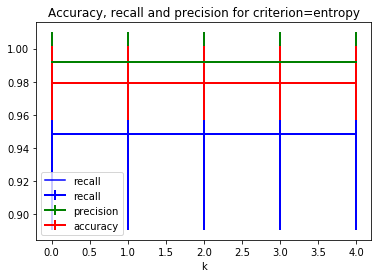

In [78]:
from sklearn import svm

ker = ['linear', 'poly', 'rbf', 'sigmoid']

mean_acc =[]
mean_rec =[]
mean_pre =[]

std_acc = []
std_rec = []
std_pre = []

for k in kernel:
 
    split_acc = [] 
    split_rec = []
    split_pre = []

    for split in random_splits:

        train, test = split

        sv=svm.SVC(gamma='scale', decision_function_shape='ovo') 
        sv.fit(trainingdata[train], target[train])
        svresult = sv.predict(trainingdata[test])
        split_acc.append(metrics.accuracy_score(target[test],  svresult))
        split_rec.append(metrics.recall_score(target[test],  svresult))
        split_pre.append(metrics.precision_score(target[test],  svresult))

    std_acc.append(statistics.stdev(split_acc))
    mean_acc.append(statistics.mean(split_acc))

    std_rec.append(statistics.stdev(split_rec))
    mean_rec.append(statistics.mean(split_rec))

    std_pre.append(statistics.stdev(split_pre))
    mean_pre.append(statistics.mean(split_pre))

X = np.arange(0,np.size(kernel))
Y = np.array(mean_acc)
nd = np.argmax(Y)
best_kern = depth[nd]

Xmax = np.tile(best_depth,2)
Ymax = np.array([0.8, 1])

plt.plot(X, mean_rec, color='blue', label = 'recall')
plt.errorbar(X, mean_rec, std_rec, color='blue', label = 'recall', lw=2)
plt.errorbar(X, mean_pre, std_pre, color='green', label = 'precision', lw=2)
plt.errorbar(X, mean_acc, std_acc, color='red', label = 'accuracy',  lw=2)
#   plt.plot(Xmax, Ymax, 'y--', label = 'max accuracy')
plt.xlabel('k')
plt.legend()
plt.title("Accuracy, recall and precision for criterion="+str(crit))
plt.show() 





In [82]:
clf=clf=svm.LinearSVC(C =0.8, loss='hinge')
clf.fit(trainingdata,target)
svmresult=clf.predict(MainTest)

svm_sol = np.array(svmresult)    
svm_id_sol = np.column_stack((main_test_id, svm_sol))


with open('breast_cancer_solution_svm.csv', 'w') as csvfile:
    fieldnames = ['ID', 'class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for row in svm_id_sol:
        if row[1] == 0:
            writer.writerow({'ID': int(row[0]), 'class': "B"})
        else:
            writer.writerow({'ID': int(row[0]), 'class': "M"})

    